In [8]:
import numpy as np
import pandas as pd
import gzip
import matplotlib.pyplot as plt
import seaborn as sns

# Parsing and importing datas

In [9]:
def parse_vote(vote_str):
    vote_dict = {}
    lines = vote_str.split('\n')
    for line in lines:
        if ':' in line:
            key, value = line.split(':', 1) 
            vote_dict[key.strip()] = value.strip()
    return vote_dict

data = []
with gzip.open('Data/wiki-RfA.txt.gz', 'rt') as file:
    content = file.read()
    
    # Split votes using blank lines
    votes = content.strip().split('\n\n')
    
    # Process each vote
    for vote in votes:
        vote_data = parse_vote(vote)
        data.append(vote_data)

df = pd.DataFrame(data)

df['VOT'] = pd.to_numeric(df['VOT'],errors='coerce')
df['RES'] = pd.to_numeric(df['RES'],errors='coerce')
df['YEA'] = pd.to_numeric(df['YEA'],errors='coerce')

df.head(10)

,SRC,TGT,VOT,RES,YEA,DAT,TXT
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","'''Support''', with great pleasure. I work wit..."
5,Sven Manguard,BDD,1,1,2013,"01:53, 20 April 2013",'''Support''' There are plenty of important ro...
6,Ramaksoud2000,BDD,1,1,2013,"02:00, 20 April 2013",'''Support''' per noms. I don't see a reason n...
7,RockMagnetist,BDD,1,1,2013,"02:18, 20 April 2013",'''Support''' BDD already wields a broom pret...
8,Carrite,BDD,1,1,2013,"02:22, 20 April 2013",'''Support''' barring a completely unexpected ...
9,Someguy1221,BDD,1,1,2013,"03:09, 20 April 2013",'''Support''' because I see no good reason not...


In [10]:
comments = df[['TXT']]
print(len(np.unique(comments)))
print(len(comments))

163219
198275


In [11]:
len(df[(df['TXT'].str.len()>6000)==True])

3

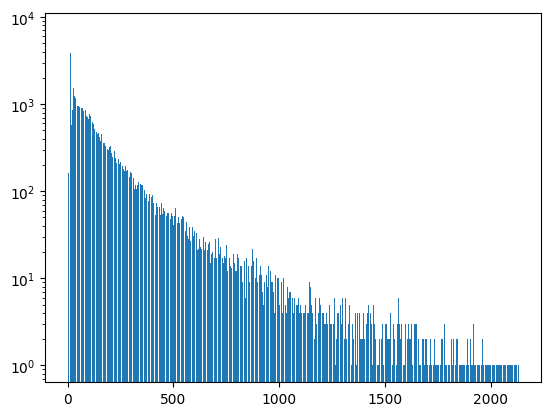

In [12]:
sizeOcomment =df['TXT'].str.len()
unique, counts = np.unique(sizeOcomment, return_counts=True)
values = dict(zip(unique, counts))

plt.bar(range(len(values)), list(values.values()), log=True)
plt.show()